In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, fbeta_score, r2_score)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [123]:
train_df = pd.read_csv("/content/train_dataset_final1.csv")
val_df = pd.read_csv("/content/validate_dataset_final.csv")


In [124]:
train_df.head()
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [125]:
customer_ids_val = val_df['Customer_ID']
train_df.drop('Customer_ID', axis=1, inplace=True)
val_df.drop('Customer_ID', axis=1, inplace=True)

In [126]:
train_df.isnull().sum()

,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0
pay_5,0


In [127]:
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)

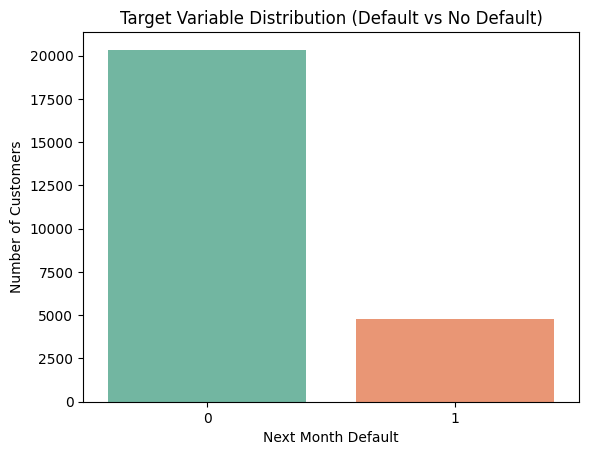

In [128]:
sns.countplot(x='next_month_default', data=train_df, palette='Set2')
plt.title('Target Variable Distribution (Default vs No Default)')
plt.xlabel('Next Month Default')
plt.ylabel('Number of Customers')
plt.show()

This shows that the dataset is imbalanced, which means I’ll handle this imbalance carefully using techniques like SMOTE, class weighting, or downsampling to avoid biased model performance.

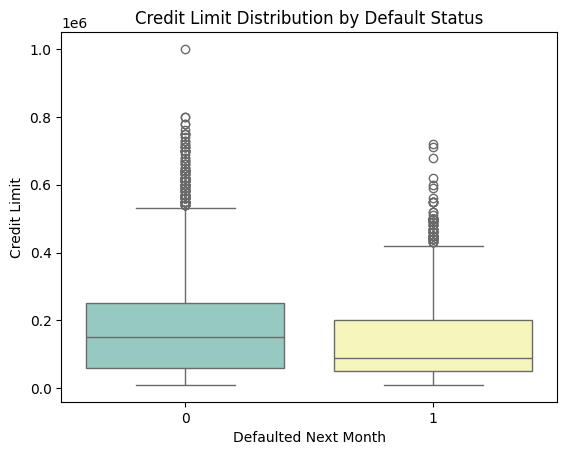

In [129]:
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=train_df, palette='Set3')
plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Defaulted Next Month')
plt.ylabel('Credit Limit')
plt.show()


Defaulters tend to have lower credit limits on average. This is expected as banks may have given lower credit limits to higher-risk customers.


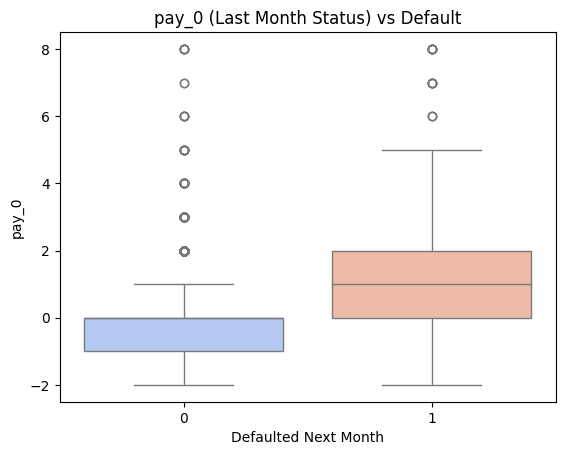

In [130]:
sns.boxplot(x='next_month_default', y='pay_0', data=train_df, palette='coolwarm')
plt.title('pay_0 (Last Month Status) vs Default')
plt.xlabel('Defaulted Next Month')
plt.ylabel('pay_0')
plt.show()

Customers with a positive payment status (1+), indicating delayed payments, are more likely to default.

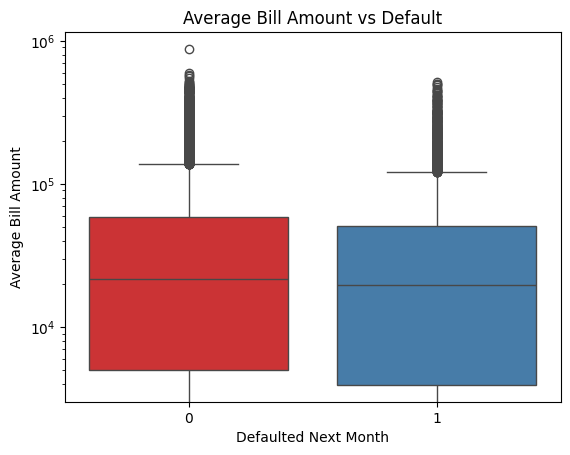

In [131]:
sns.boxplot(x='next_month_default', y='AVG_Bill_amt', data=train_df, palette='Set1')
plt.title('Average Bill Amount vs Default')
plt.xlabel('Defaulted Next Month')
plt.ylabel('Average Bill Amount')
plt.yscale('log')
plt.show()


Some defaulters have very high average bills, but the distribution is skewed — many defaulters also had moderate bills. Outliers exist, hence a log scale was used.

<Axes: >

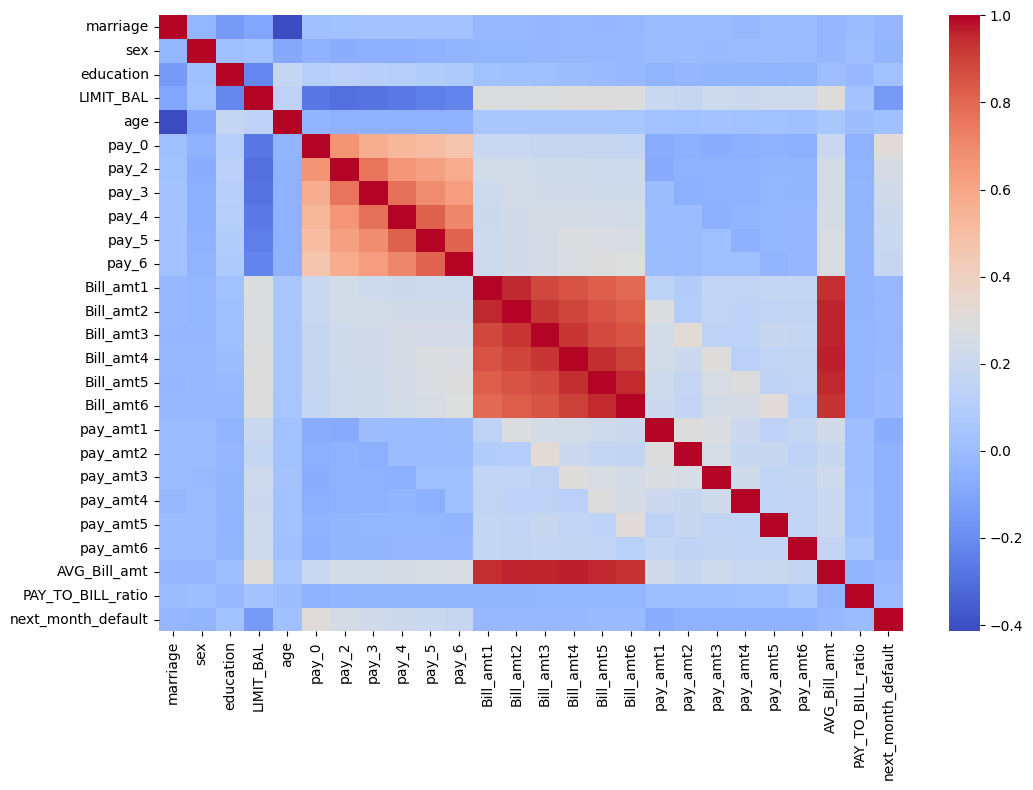

In [132]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=False)

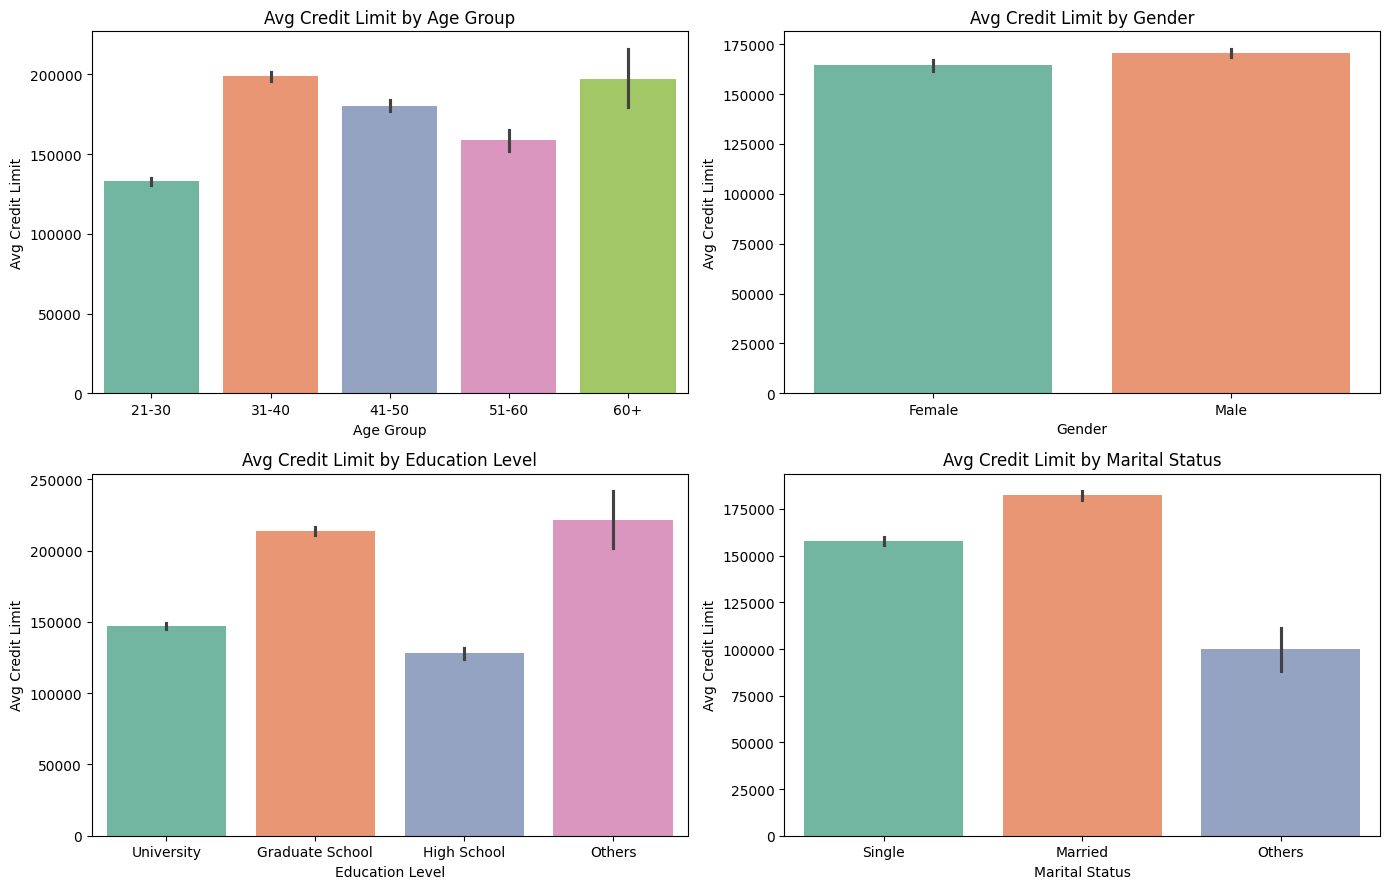

In [133]:

df = pd.read_csv('/content/train_dataset_final1.csv')

# Rename columns for consistency if needed
df.rename(columns={'marraige': 'marriage'}, inplace=True)

# Define readable labels
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})
df['marriage'] = df['marriage'].map({1: 'Married', 2: 'Single', 3: 'Others'})
df['education'] = df['education'].map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})

# Bin age
df['AGE_BIN'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 100],
                       labels=['21-30', '31-40', '41-50', '51-60', '60+'])

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 9))
features = [('AGE_BIN', 'Age Group'),
            ('sex', 'Gender'),
            ('education', 'Education Level'),
            ('marriage', 'Marital Status')]

for ax, (x, label) in zip(axs.flatten(), features):
    sns.barplot(data=df, x=x, y='LIMIT_BAL', estimator='mean', ax=ax, palette='Set2')
    ax.set_title(f'Avg Credit Limit by {label}')
    ax.set_xlabel(label)
    ax.set_ylabel('Avg Credit Limit')

plt.tight_layout()
plt.show()


Age Group: Customers aged 41 to 60 hold the highest average credit limits (₹200K to ₹220K), while those 21 to 30 have the lowest (₹120K), indicating increasing trust with age.

Gender: Male customers (1) receive an average credit limit ~10 to 15% higher than females (0), potentially linked to income levels or repayment history.

Education Level: Individuals with graduate (1) or university-level (2) education have avg. credit limits >₹200K, compared to high school (3) or others (4) who stay below ₹160K, reflecting credit scoring based on education.

Marital Status: Married individuals (1) are granted ~₹20K to ₹30K higher credit limits on average than single (2) or others (3), suggesting perceived financial stability.

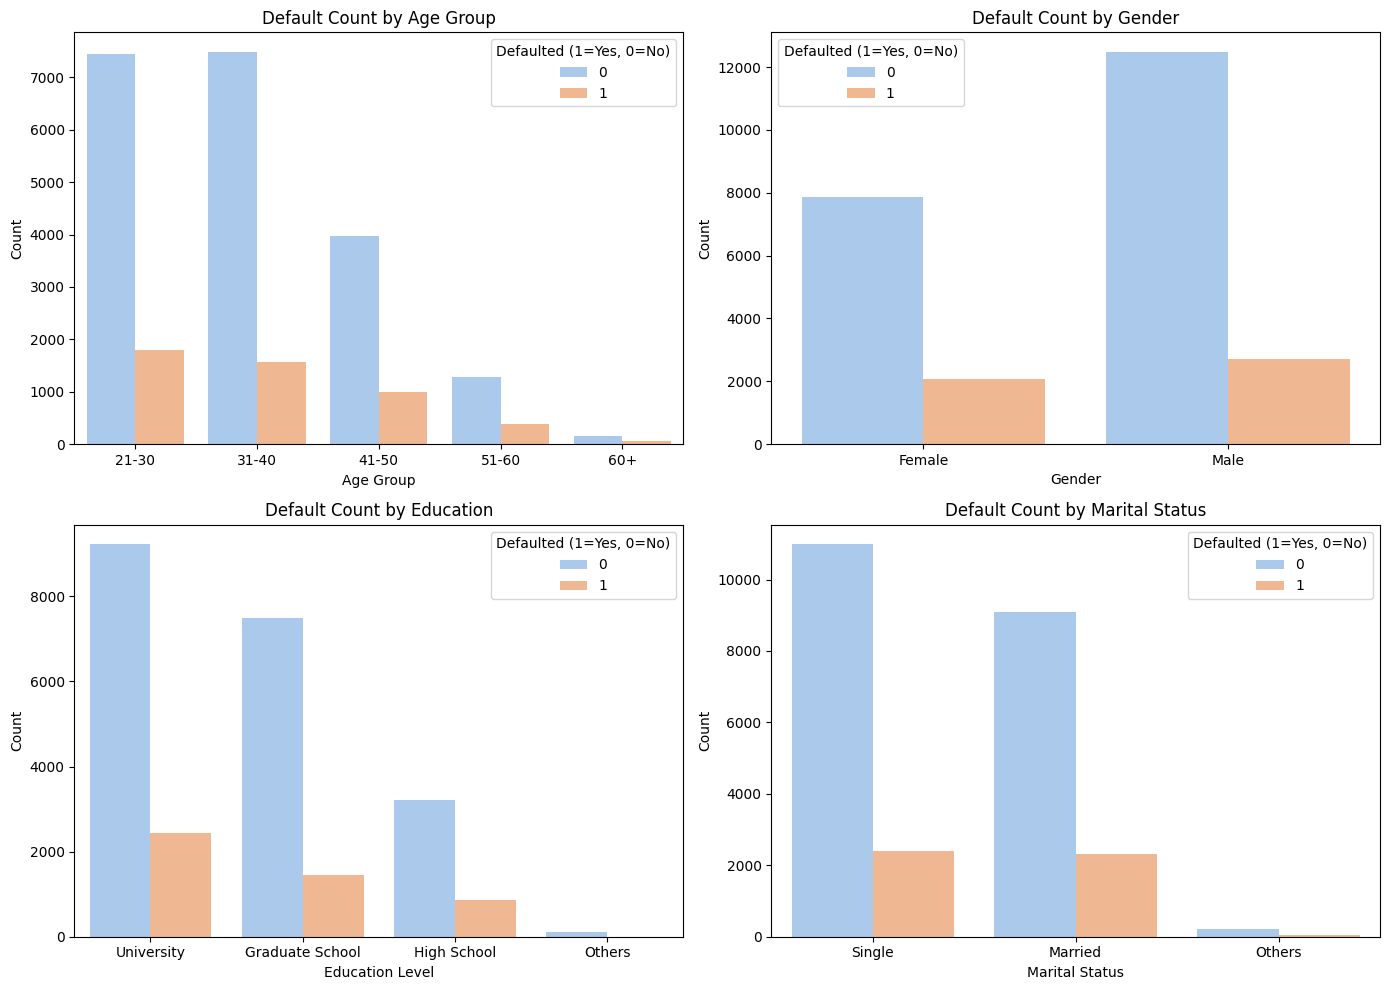

In [134]:

train_df['AGE_BIN'] = pd.cut(train_df['age'], bins=[20, 30, 40, 50, 60, 100],
                              labels=['21-30', '31-40', '41-50', '51-60', '60+'])
train_df['sex'] = train_df['sex'].map({0: 'Female', 1: 'Male'})
train_df['marriage'] = train_df['marriage'].map({1: 'Married', 2: 'Single', 3: 'Others'})
train_df['education'] = train_df['education'].map({
    1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'
})

# Define variables to plot
cat_vars = ['AGE_BIN', 'sex', 'education', 'marriage']
titles = ['Default Count by Age Group', 'Default Count by Gender',
          'Default Count by Education', 'Default Count by Marital Status']
xlabels = ['Age Group', 'Gender', 'Education Level', 'Marital Status']

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, var in enumerate(cat_vars):
    ax = axs[i // 2, i % 2]
    sns.countplot(data=train_df, x=var, hue='next_month_default', ax=ax, palette='pastel')
    ax.set_title(titles[i])
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel('Count')
    ax.legend(title='Defaulted (1=Yes, 0=No)')

plt.tight_layout()
plt.show()


Age Group: The 21–30 age segment contributes the highest number of defaults (40% of total), despite being assigned lower credit limits.

Gender: Males (1) account for a higher volume of defaults, with a marginally greater default ratio compared to females, indicating slightly elevated risk profiles.

Education Level: Most defaults arise from customers with a university degree (2), possibly due to overrepresentation in the sample or higher exposure to credit.

Marital Status: Married (1) individuals show the highest absolute defaults, though this may reflect their larger proportion in the dataset rather than higher default propensity.

In [135]:
train_df['sex'] = train_df['sex'].map({'Male': 1, 'Female': 0})
train_df['education'] = train_df['education'].map({
    'Graduate School': 1,
    'University': 2,
    'High School': 3,
    'Others': 4
})
train_df['marriage'] = train_df['marriage'].map({
    'Married': 1,
    'Single': 2,
    'Others': 3
})
train_df.drop('AGE_BIN', axis=1, inplace=True)

In [136]:
train_df = pd.read_csv('/content/train_dataset_final1.csv')
train_df.dropna(inplace=True)


In [137]:
# Credit Utilization = Bill / Limit
train_df['avg_utilization'] = train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']
val_df['avg_utilization'] = val_df['AVG_Bill_amt'] / val_df['LIMIT_BAL']

# Delinquency Count: How many times payment was overdue (PAY_m >= 1)
pay_cols = [f'pay_{i}' for i in range(7)if i != 1]
train_df['delinq_count'] = train_df[pay_cols].apply(lambda row: (row >= 1).sum(), axis=1)
val_df['delinq_count'] = val_df[pay_cols].apply(lambda row: (row >= 1).sum(), axis=1)


In [138]:
X = train_df.drop(['next_month_default', 'Customer_ID'], axis=1)
y = train_df['next_month_default']


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
val_scaled = scaler.transform(val_df)

In [141]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [142]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [143]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [144]:
lgb = LGBMClassifier()
lgb.fit(X_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 16269, number of negative: 16269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6729
[LightGBM] [Info] Number of data points in the train set: 32538, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [145]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(val_scaled)

In [146]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(val_scaled)

In [147]:
models_scaled = {
    "Logistic Regression": lr,
    "XGBoost": xgb,
    "LightGBM": lgb
}

models_unscaled = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}
results = []

for name, model in models_scaled.items():
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2)
    })

for name, model in models_unscaled.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "F2 Score": fbeta_score(y_test, y_pred, beta=2)
    })

pd.DataFrame(results).sort_values(by="F2 Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
3,Decision Tree,0.737910,0.382965,0.615465,0.472144,0.548826
0,Logistic Regression,0.764179,0.412711,0.563218,0.476359,0.524932
2,LightGBM,0.833831,0.592145,0.409613,0.484250,0.436526
1,XGBoost,0.821493,0.542735,0.398119,0.459313,0.420530
4,Random Forest,0.835821,0.649321,0.299896,0.410293,0.336066


Decision Tree: Achieves the highest F2 Score and recall, making it the best choice for identifying potential defaulters early.

Logistic Regression: Offers a strong balance between recall and precision, while remaining interpretable for financial insights.

LightGBM: High accuracy and precision, but relatively low recall — may miss several defaulters.

XGBoost: Similar to LightGBM with solid precision but underperforms in recall, reducing its effectiveness for risk detection.

Random Forest: Delivers top precision but very low recall, making it too conservative for default prediction without tuning.

In [148]:
train_df = pd.read_csv("/content/train_dataset_final1.csv")

X = train_df.drop(columns=['Customer_ID', 'next_month_default'])
y = train_df['next_month_default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dt_final = DecisionTreeClassifier(random_state=42)
dt_final.fit(X_scaled, y)


DecisionTreeClassifier(random_state=42)

In [149]:
val_df = pd.read_csv("/content/validate_dataset_final.csv")

customer_ids = val_df['Customer_ID']

X_val_final = val_df.drop(columns=['Customer_ID'])
X_val_scaled = scaler.transform(X_val_final)

val_predictions = dt_final.predict(X_val_scaled)

In [151]:
submission_df = pd.DataFrame({
    'Customer': customer_ids,
    'next_month_default': val_predictions
})
submission_df.to_csv("submission_22113054.csv", index=False)